In [2]:
import warnings
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from pylab import rcParams 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline, Pipeline
from mlxtend.regressor import StackingCVRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

In [5]:
from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, 
GradientBoostingRegressor, VotingRegressor)

from sklearn.linear_model import ARDRegression

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [7]:
from sklearn.linear_model import Ridge, SGDRegressor, BayesianRidge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR

In [8]:
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set(style="darkgrid", color_codes=True)
warnings.filterwarnings('ignore')

In [9]:
# Read in data as pandas dataframe 
X_train = pd.read_csv('HP_MN_X_train.csv')
X_test = pd.read_csv('HP_MN_X_test.csv')

y_train = pd.read_csv('y_train.csv')

In [10]:
X_train = X_train.drop('Unnamed: 0', axis=1)
X_test = X_test.drop('Unnamed: 0', axis=1)
y_train = y_train.drop('Unnamed: 0', axis=1)

y_train = y_train.SalePrice

X_train.shape, y_train.shape, X_test.shape

((1457, 315), (1457,), (1459, 315))

In [11]:
estimators = [
    
    SGDRegressor(loss='epsilon_insensitive', penalty='elasticnet', alpha=4.778421447265439e-05, 
                       l1_ratio=0.14999999999999974, fit_intercept=True, tol=0.001, epsilon=0.1, 
                       random_state=42, learning_rate='constant', eta0=7.559625810320152e-05, 
                       average=False),
    
    LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9, n_jobs=5,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 1),
    
    XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=3000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, n_jobs=5,
                             random_state =42),
    
    Ridge(alpha=9.458302019360064, tol=1e-100, random_state=42, fit_intercept=True),
    
    BayesianRidge(alpha_1=0.006428073117284319, alpha_2=6.579332246575683e-06,
                  compute_score=False, copy_X=True, fit_intercept=True,
                  lambda_1=0.00011233240329780266, lambda_2=0.0037649358067924714,
                  n_iter=300, normalize=False, tol=0.001, verbose=False),
    
    AdaBoostRegressor(),
    
    ExtraTreesRegressor(),
    
    KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
    
    GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42),
    
    Lasso(alpha =0.0005, random_state=42),
    
    ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42),
    
    LinearSVR(epsilon=0.003651447080658049, tol=2.547030869157463e-05, C=15.568148066386238,
              loss='squared_epsilon_insensitive', fit_intercept=True,
              intercept_scaling=1.0, dual=False, verbose=0, random_state=0),
    
    SVR(C= 20, epsilon= 0.008, gamma=0.0003),
    
    KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    
    RandomForestRegressor(random_state=42, criterion='friedman_mse',
                                        max_depth=18, 
                                        min_samples_split=2,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=2, 
                                        n_estimators=600,
                                        min_weight_fraction_leaf=0.0, n_jobs=5)
    
]

In [12]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [13]:
def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf, n_jobs=5))
    return (rmse)

In [14]:
score_iterative_qt0 = []
est0 = []

for impute_estimator in estimators:
    estimator = make_pipeline(
        RobustScaler(),
        impute_estimator)
    
    cv = cv_rmse(impute_estimator)
    print(f'{impute_estimator.__class__.__name__} score = {round(cv.mean(),4)}')
    print()
    score_iterative_qt0.append(round(cv.mean(),4))
    est0.append(str(impute_estimator.__class__.__name__))

SGDRegressor score = 577.3844

LGBMRegressor score = 0.1123

XGBRegressor score = 0.1137

Ridge score = 0.1094

BayesianRidge score = 0.1095

AdaBoostRegressor score = 0.1704

ExtraTreesRegressor score = 0.1458

KernelRidge score = 0.2281

GradientBoostingRegressor score = 0.1122

Lasso score = 0.1073

ElasticNet score = 0.1073

LinearSVR score = 0.1779

SVR score = 0.2905

KNeighborsRegressor score = 0.1992

RandomForestRegressor score = 0.1351



In [15]:
scores0 = pd.concat([pd.Series(score_iterative_qt0), pd.Series(est0)], axis=1)
scores0.columns = ['score', 'esimator']
scores0 = scores0.sort_values(by='score', ascending=False)
scores0.index = scores0.esimator
scores0 = scores0.drop('esimator', axis=1)
scores0 = scores0.iloc[1:]

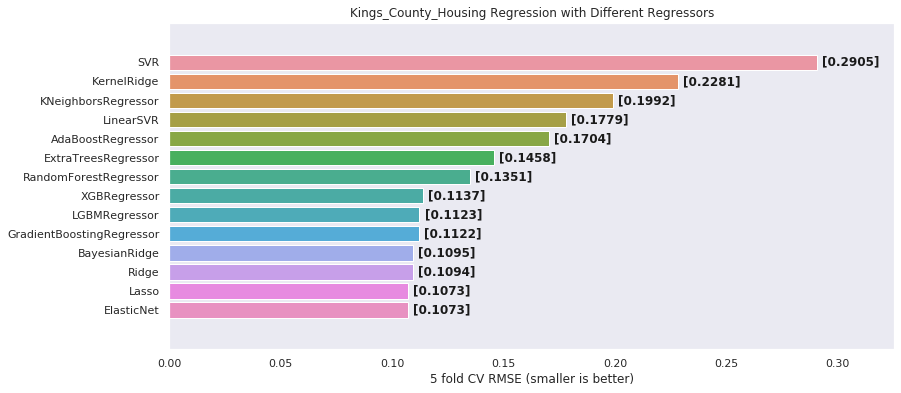

In [17]:
# plot boston results
fig, ax = plt.subplots(figsize=(13, 6))
sns.barplot(x='score', y=scores0.index.values, data=scores0, ax=ax)
for i, v in enumerate(scores0.values):
    ax.text(v + 0.028, i, str(v), color='k', fontweight='bold', fontsize=12, va='center', ha = 'right')
ax.set_title('Kings_County_Housing Regression with Different Regressors')
ax.set_xlabel('5 fold CV RMSE (smaller is better)')
plt.margins(0.12)
plt.grid(False)
plt.show()

In [18]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf, 
                                   n_jobs=5))
    return(rmse)

In [19]:
rf = RandomForestRegressor(random_state=0, criterion='friedman_mse', min_samples_split = 8, 
                          max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=3, 
                          n_estimators=1200, min_weight_fraction_leaf=0.0, n_jobs=5)

xgboost = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, n_jobs=5,
                             random_state =42)

ridge = Ridge(alpha=9.458302019360064, tol=1e-100, random_state=42, fit_intercept=True)

gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

lightgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9, n_jobs=5,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 1)

bridge = BayesianRidge(alpha_1=0.006428073117284319, alpha_2=6.579332246575683e-06,
                  compute_score=False, copy_X=True, fit_intercept=True,
                  lambda_1=0.00011233240329780266, lambda_2=0.0037649358067924714,
                  n_iter=300, normalize=False, tol=0.001, verbose=False)

lasso = Lasso(alpha =0.0005, random_state=42)

enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42)

etree = ExtraTreesRegressor()

svr = SVR(C= 20, epsilon= 0.008, gamma=0.0003)

krdg = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [20]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [21]:
averaged_models = AveragingModels(models = (enet, lasso, lightgbm, gbr, ridge))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1068 (0.0068)



In [22]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                y0 = y.values
                instance.fit(X[train_index], y0[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [23]:
stacked_averaged_models = StackingAveragedModels(base_models = (lasso, bridge, lightgbm, gbr, xgboost),
                                                 meta_model = enet)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1066 (0.0065)


In [24]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [25]:
st_avg_models = stacked_averaged_models.fit(X_train.values, y_train)
st_avg_models_train_pred = st_avg_models.predict(X_train.values)
st_avg_models_pred = np.expm1(st_avg_models.predict(X_test.values))
print(rmsle(y_train, st_avg_models_train_pred))

0.08500140079820087


In [27]:
# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(enet, lasso, bridge, lightgbm, gbr, xgboost),
                                meta_regressor=lightgbm,
                                use_features_in_secondary=True)

In [28]:
stack_gen.fit(X_train.values, y_train)
stack_gen_train_pred = stack_gen.predict(X_train.values)
stack_gen_pred = np.expm1(stack_gen.predict(X_test.values))
print(rmsle(y_train, stack_gen_train_pred))

0.06277481886740532


In [29]:
# Fit Models 
avg_models = averaged_models.fit(X_train, y_train)

lgb_model_full_data = lightgbm.fit(X_train, y_train)

xgb_model_full_data = xgboost.fit(X_train, y_train)

enet_model_full_data = enet.fit(X_train, y_train)

bridge_model_full_data = bridge.fit(X_train, y_train)

lasso_model_full_data = lasso.fit(X_train, y_train)

gbr_model_full_data = gbr.fit(X_train, y_train)

In [30]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X_train):
    return ((0.05 * enet_model_full_data.predict(X_train)) + \
            (0.05 * gbr_model_full_data.predict(X_train)) + \
            (0.05 * lasso_model_full_data.predict(X_train)) + \
            (0.85 * stack_gen.predict(np.array(X_train))))

In [31]:
# Get final precitions from the blended model
blended_score = rmsle(y_train, blended_predictions(X_train))
print(blended_score)

0.06400352135052648


In [32]:
# Voting Regressor 
vtreg = VotingRegressor(estimators=[('rf1', enet), ('rf2', lasso), ('gbc', bridge), 
                                    ('xgb',lightgbm), ('gbc1', gbr), ('xgb1',xgboost)], 
                                    weights = [2.5,1.5,1.5,1.5,1.5,1.5])

vtreg.fit(X_train, y_train)

y_val_pred = vtreg.predict(X_train)
rmsle(y_train, y_val_pred)

0.08124353077844346